# 层次聚类（Hierarchical clustering）
---

In [20]:
set.seed(42)
library(stats)
library(dummy)
library(tidyverse)
library(dendextend)
library(purrr)

In [21]:
dt <- read.csv("../data/CVD_cleaned/CVD_cleaned.csv") %>% sample_n(size=100,replace=F)
head(dt)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_.cm.,Weight_.kg.,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,170,72.57,25.06,Yes,4,60,30,2
2,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,60-64,170,68.04,23.49,Yes,0,60,16,2
3,Excellent,5 or more years ago,Yes,No,No,No,No,No,No,Male,35-39,180,86.18,26.50,No,0,60,30,2
4,Very Good,Within the past year,Yes,No,No,No,No,Yes,Yes,Male,55-59,191,108.41,29.87,No,0,5,3,4
5,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,40-44,165,90.72,33.28,No,0,20,20,20
6,Excellent,Within the past year,No,Yes,No,No,No,No,No,Male,60-64,170,90.72,31.32,No,0,30,0,1


**聚类分析必须进行标准化**  
如果不标准化可能会导致某一个指标影响过度

In [36]:
dt_num <- dt %>% select(where(is.numeric))
dt_str <- dt %>% select(where(is.character))
dt_str <- dt_str %>% dummy() %>% mutate_all(as.numeric)
dt_dummy <- cbind(dt_str,dt_num)
head(dt_dummy)
scale_dt_dummy <- scale(dt_dummy) %>% na.omit()
head(scale_dt_dummy)

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_5.or.more.years.ago,Checkup_Never,Checkup_Within.the.past.2.years,Checkup_Within.the.past.5.years,Checkup_Within.the.past.year,...,Age_Category_80.,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,170,72.57,25.06,4,60,30,2
2,0,0,0,0,1,0,0,0,0,1,...,0,0,1,170,68.04,23.49,0,60,16,2
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,180,86.18,26.50,0,60,30,2
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,191,108.41,29.87,0,5,3,4
5,0,0,0,0,1,0,0,0,0,1,...,0,1,0,165,90.72,33.28,0,20,20,20
6,1,0,0,0,0,0,0,0,0,1,...,0,1,0,170,90.72,31.32,0,30,0,1


General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_5.or.more.years.ago,Checkup_Never,Checkup_Within.the.past.2.years,Checkup_Within.the.past.5.years,Checkup_Within.the.past.year,...,Age_Category_80.,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,-1.1935804,1.1935804,-0.1063235,-0.50204436,-0.5716398,-0.1860641,1.18713209,1.0089834,-0.5075936
-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,-1.1935804,1.1935804,-0.1063235,-0.68170144,-0.8066484,-0.6264526,1.18713209,0.1086795,-0.5075936
2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,3.6266868,-0.1,-0.4179783,-0.1749816,-1.6785983,...,-0.3316625,0.8294372,-0.8294372,0.7871515,0.03772005,-0.3560905,-0.6264526,1.18713209,1.0089834,-0.5075936
-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,0.8294372,-0.8294372,1.7699740,0.91934848,0.1483548,-0.6264526,-1.03369325,-0.7273169,-0.2658823
-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,0.8294372,-0.8294372,-0.5530610,0.21777372,0.6587876,-0.6264526,-0.42801361,0.3659092,1.6678074
2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,0.8294372,-0.8294372,-0.1063235,0.21777372,0.3654010,-0.6264526,-0.02422719,-0.9202391,-0.6284492


**这种混合数据其实是不适合用euclidean距离的**  
但是姑且随便试试

In [23]:
dist_dt <- dist(scale_dt_dummy,method="euclidean")
dist_dt

            1         2         3         4         5         6         7
2    6.280200                                                            
3    7.713005  9.077089                                                  
4   11.280792 10.142170 11.508620                                        
5    7.409477  7.139839  8.982100 10.494897                              
6    8.215021  8.472915  8.757585 11.411621  8.942749                    
7    9.369847  9.353365 12.162229 11.938387 11.050067 11.279235          
8   10.116715  9.843450 10.525169 13.283288  9.715324 11.814581 11.709395
9    6.330361  4.294935  8.194638 10.052868  5.641169  7.223120 10.225642
10   5.369846  8.140864  8.547155 11.790512  7.909816  6.262951 10.602586
11  10.839270 10.940383 11.742240 10.793970 11.192074  8.878089 10.625235
12   6.206970  8.717986  8.801731 11.272953  8.826291  6.106178 10.956460
13   8.355209  8.430189 10.471251 11.144691  9.729954  8.468117  9.569543
14   7.439097  7.071625  9.154736 11.2

将所有人分成4个组，所以cutree里面k填4  
生成好之后会按数据框的行的顺序生成一列vector，用mutate填进去就行了

In [24]:
hc_dt <- hclust(dist_dt,method="complete")
cluster_k4 <- cutree(hc_dt,k=4)
cluster_k4
cluster_dt <- mutate(dt,cluster=cluster_k4)
head(cluster_dt)

[1] 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 3 1 1 2 2 2 1
 [38] 2 1 1 2 1 1 2 1 1 1 2 2 4 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1
 [75] 1 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_.cm.,Weight_.kg.,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,cluster
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,170,72.57,25.06,Yes,4,60,30,2,1
2,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,60-64,170,68.04,23.49,Yes,0,60,16,2,2
3,Excellent,5 or more years ago,Yes,No,No,No,No,No,No,Male,35-39,180,86.18,26.50,No,0,60,30,2,1
4,Very Good,Within the past year,Yes,No,No,No,No,Yes,Yes,Male,55-59,191,108.41,29.87,No,0,5,3,4,2
5,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,40-44,165,90.72,33.28,No,0,20,20,20,1
6,Excellent,Within the past year,No,Yes,No,No,No,No,No,Male,60-64,170,90.72,31.32,No,0,30,0,1,1


正常的聚类图直接把hclust得到的结果plot就能画了

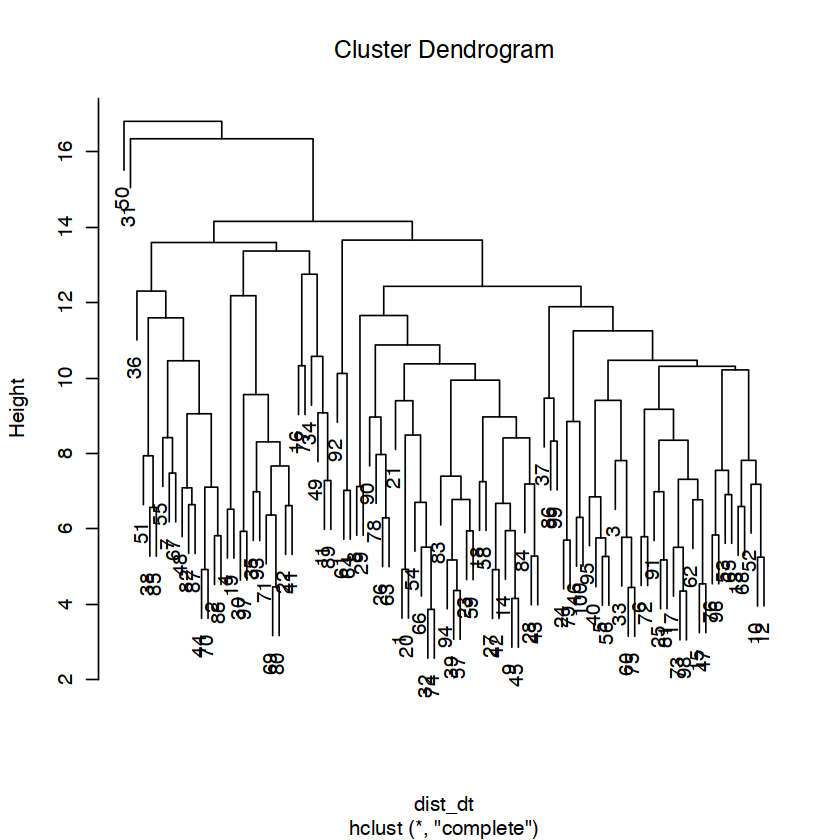

In [25]:
plot(hc_dt)

用颜色标出来的话，要用到dendextend包  
比如分成4个组的话，color_branches的k填4  
也可以指定h来分组（一般用k就行了）

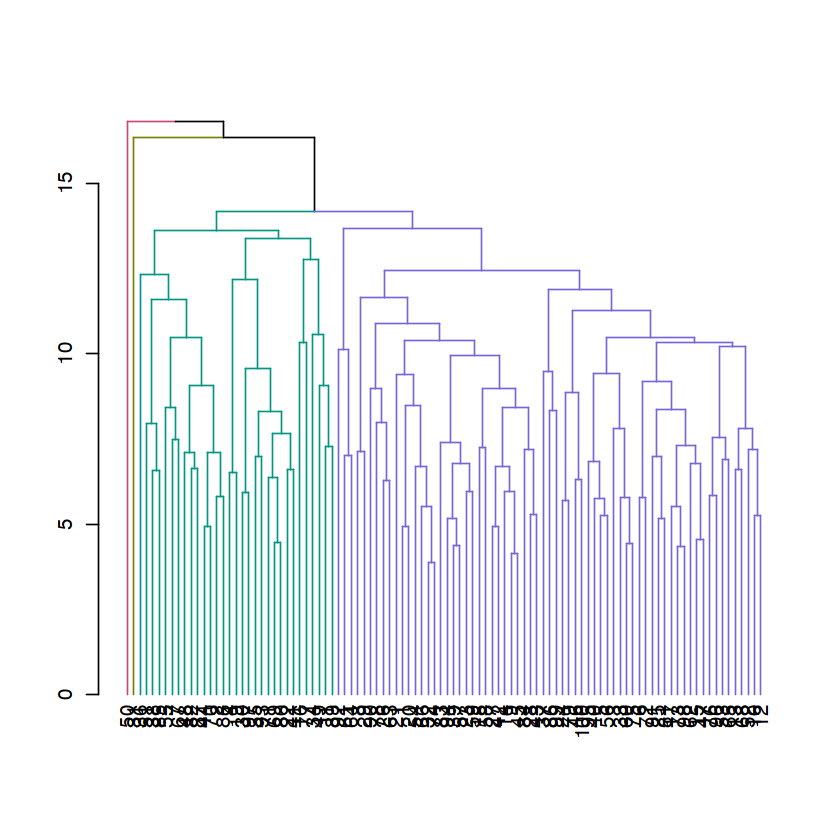

In [26]:
dend_hc_dt <- as.dendrogram(hc_dt)
colored_hc_dt <- color_branches(dend_hc_dt,k=4)
plot(colored_hc_dt)

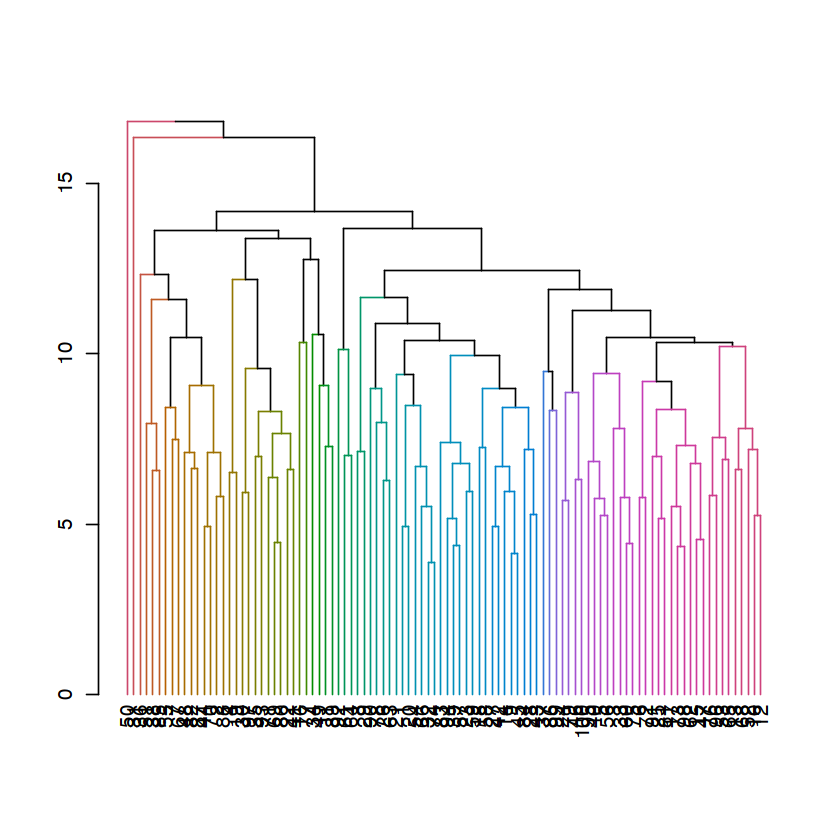

In [27]:
dend_hc_dt <- as.dendrogram(hc_dt)
colored_hc_dt <- color_branches(dend_hc_dt,h=8)
plot(colored_hc_dt)

# k平均算法（k-means clustering）
---

其实和hclust差不多，只不过kmeans得**先指定好k再聚类**  
而hclust则是**聚类完之后再取k**  
这里的k就是kmeans参数里面的centers，意味簇的个数

In [28]:
 km_dt_dummy<- kmeans(scale_dt_dummy,centers=4)
 km_dt <- scale_dt_dummy %>% 
    data.frame() %>% 
    mutate(cluster=km_dt_dummy$cluster)
head(km_dt)

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_5.or.more.years.ago,Checkup_Never,Checkup_Within.the.past.2.years,Checkup_Within.the.past.5.years,Checkup_Within.the.past.year,...,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-1.1935804,1.1935804,-0.1063235,-0.50204436,-0.5716398,-0.1860641,1.18713209,1.0089834,-0.5075936,2
2,-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-1.1935804,1.1935804,-0.1063235,-0.68170144,-0.8066484,-0.6264526,1.18713209,0.1086795,-0.5075936,4
3,2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,3.6266868,-0.1,-0.4179783,-0.1749816,-1.6785983,...,0.8294372,-0.8294372,0.7871515,0.03772005,-0.3560905,-0.6264526,1.18713209,1.0089834,-0.5075936,3
4,-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,0.8294372,-0.8294372,1.7699740,0.91934848,0.1483548,-0.6264526,-1.03369325,-0.7273169,-0.2658823,3
5,-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,0.8294372,-0.8294372,-0.5530610,0.21777372,0.6587876,-0.6264526,-0.42801361,0.3659092,1.6678074,4
6,2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,0.8294372,-0.8294372,-0.1063235,0.21777372,0.3654010,-0.6264526,-0.02422719,-0.9202391,-0.6284492,3


如果只有x，y，最多再来个z还能做个图，特征值太多不能可视化就算咯

# 选择最好的k
---

目前为止k的选择都是姑且认为是4  
但是感觉4好像有点不对，所以得尝试不同的k值的模型

其原理是，k分得越多，模型的**total within-cluster sum of squares**（聚类中心的距离平方和最小，WCSS，i.e.方差最小）会越来越小  
但是k最多的时候也就是所有对象自成一组，那么聚类就毫无意义了  

一般而言，k在增多的时候，模型的WCSS会急剧下降直至一个拐点，之后会缓慢下降  
这个拐点就是我们要找的k

这里需要用到purrr包的map_dbl函数来测试模型的tot.withinss

In [44]:
tot_withinss <- map_dbl(1:80,  function(k){
  model <- kmeans(x = scale_dt_dummy, centers = k)
  model$tot.withinss
})
tot_withinss

[1] 4851.0000 4541.6671 4306.0033 4173.8452 3918.4121 3771.4435 3708.5684
 [8] 3480.8093 3395.2050 3227.5301 3173.6074 3054.6142 2941.5002 2733.8479
[15] 2729.1542 2622.5329 2558.7609 2478.1840 2307.0958 2276.2990 2134.3055
[22] 2105.2423 2041.5037 1970.6692 1910.4342 1864.2489 1799.6796 1741.4197
[29] 1688.1480 1689.9922 1635.5548 1580.9358 1504.7109 1476.0126 1469.8080
[36] 1399.5489 1355.3930 1308.2933 1276.5333 1260.9904 1208.8345 1190.1622
[43] 1158.5446 1098.8258 1084.3388 1046.8747 1043.6005 1010.5734  979.5335
[50]  931.3533  903.4405  880.7281  842.1293  848.9953  816.9580  783.0509
[57]  769.0208  748.1502  715.2583  686.4375  670.1151  638.8009  646.3534
[64]  603.5823  579.5633  578.7110  531.1977  511.7950  504.4906  496.9125
[71]  444.3990  465.1353  443.5884  386.8549  376.8118  357.3676  349.0163
[78]  323.1839  316.8749  293.3457

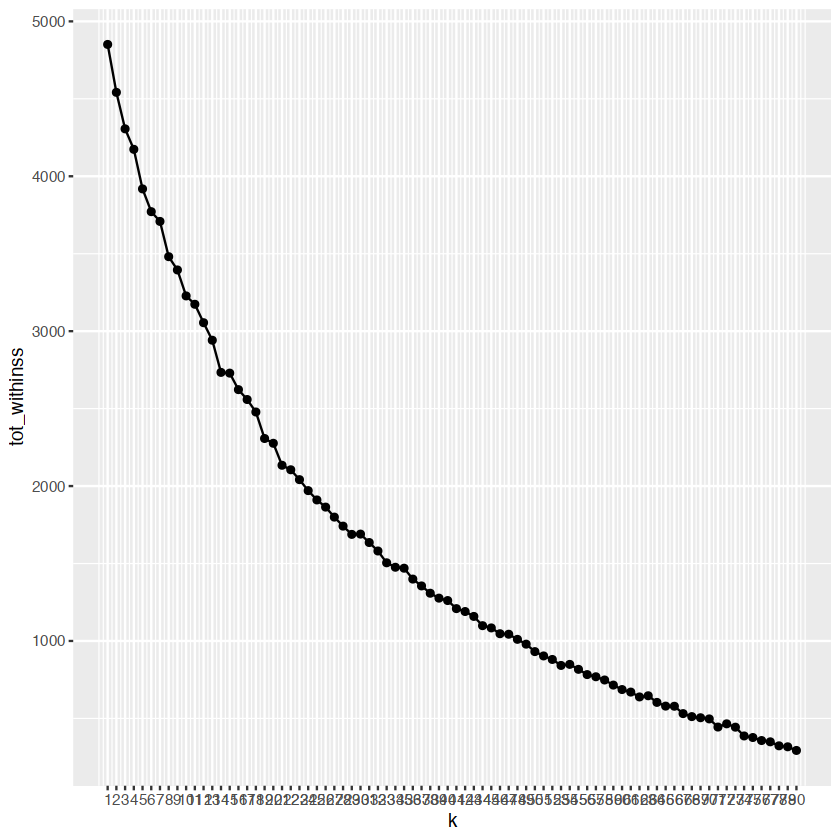

In [45]:
elbow <- data.frame(
    k=1:80,
    tot_withinss=tot_withinss
)
ggplot(elbow,aes(k,tot_withinss))+
    geom_point()+
    geom_line()+
    scale_x_continuous(breaks=1:80)

聚类结果逆天，，，  

但是大致就是这种感觉，因为这是个混合数据集，对于哑变量是不能这么聚类的  
所以看个热闹就行

换一个数据集试试，用这个brain_networks.csv

In [50]:
br_dt <- read.csv("../data/brain_networks.csv")
br_dt <- br_dt[4:nrow(br_dt),] %>% mutate_all(as.numeric)
summary(br_dt)

    network            X1                  X1.1                  X2            
 Min.   :  0.0   Min.   :-228.10130   Min.   :-203.17281   Min.   :-122.46854  
 1st Qu.:229.8   1st Qu.: -28.64557   1st Qu.: -33.57323   1st Qu.: -26.18502  
 Median :459.5   Median :   0.79593   Median :   0.16789   Median :  -0.37655  
 Mean   :459.5   Mean   :  -0.01423   Mean   :  -0.02464   Mean   :   0.00568  
 3rd Qu.:689.2   3rd Qu.:  29.26968   3rd Qu.:  34.07531   3rd Qu.:  23.39532  
 Max.   :919.0   Max.   : 163.61554   Max.   : 180.64194   Max.   : 188.27942  
      X2.1                  X3                 X3.1           
 Min.   :-113.23235   Min.   :-84.01804   Min.   :-101.68722  
 1st Qu.: -29.35663   1st Qu.:-15.42504   1st Qu.: -18.49718  
 Median :  -2.22332   Median : -1.40544   Median :  -1.58595  
 Mean   :   0.02067   Mean   :  0.00127   Mean   :   0.00589  
 3rd Qu.:  24.29352   3rd Qu.: 15.11082   3rd Qu.:  16.69877  
 Max.   : 224.82027   Max.   :131.83969   Max.   : 159.68114  

In [51]:
br_tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = br_dt, centers = k)
  model$tot.withinss
})
br_tot_withinss

[1] 152512564 103835334  94785121  89411847  84616206  81520465  79504380
 [8]  77444980  75886060  74769660

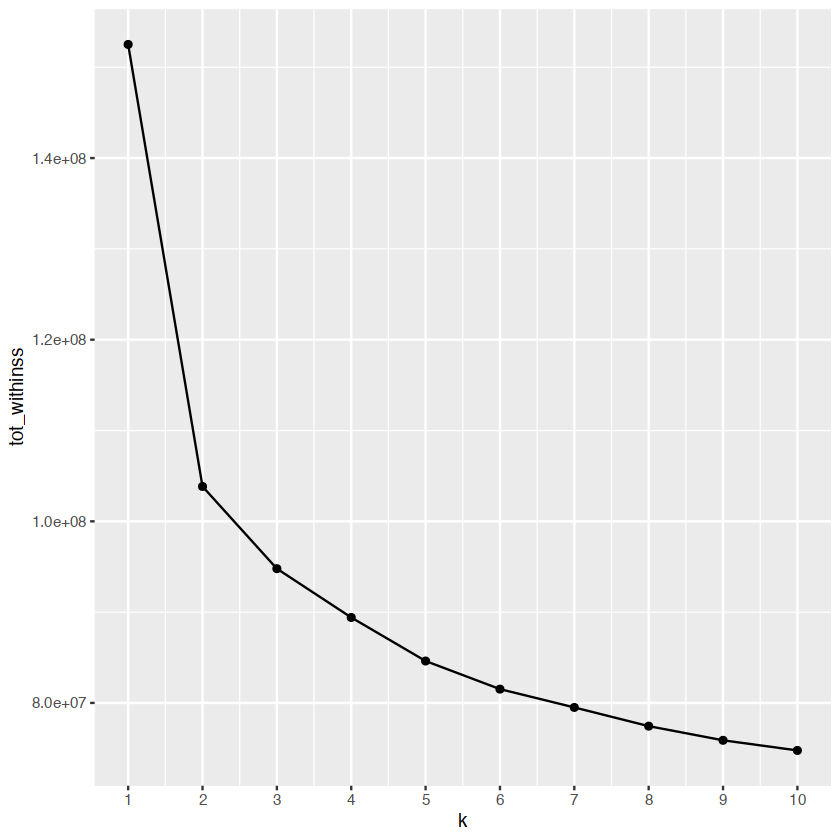

In [52]:
br_elbow <- data.frame(
    k=1:10,
    tot_withinss=br_tot_withinss
)
ggplot(br_elbow,aes(k,tot_withinss))+
    geom_point()+
    geom_line()+
    scale_x_continuous(breaks=1:10)

可以看到k=2的时候tot_withinss急剧下降，所以k选择2是最好的